# 1. Importing Libraries

In [56]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [57]:
df1 = pd.read_csv("mudah-apartment-kl-selangor.csv")
df1.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [58]:
df1.shape

(19991, 14)

In [59]:
df1.duplicated().sum()

8

In [60]:
df2 = df1.drop_duplicates()

In [61]:
df2.shape

(19983, 14)

In [62]:
df2.duplicated().sum()

0

In [63]:
#Creating new column for nearby trains

def near_ktm_lrt(text):
    pattern = re.compile(r'\bNear KTM/LRT\b')
    try:
        match = pattern.search(text)
        if match:
            return 'yes'
        return 'no'
    except TypeError:
        return text

In [64]:
df2['nearby_trains'] = df2.additional_facilities.apply(lambda x: near_ktm_lrt(x))
df2.head()

C:\Users\spide\AppData\Local\Temp\ipykernel_12940\1616864306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nearby_trains'] = df2.additional_facilities.apply(lambda x: near_ktm_lrt(x))


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,nearby_trains
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,no
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,yes
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,NaN
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,yes
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,no


In [65]:
# Dropping unwanted columns

df3 = df2.drop(['ads_id','prop_name','completion_year','facilities','additional_facilities','region'],axis='columns')
df3.head()

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,nearby_trains
0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,no
1,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,yes
2,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,NaN
3,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,yes
4,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,no


In [66]:
# Removing RM and per month from monthly rent

df3['monthly_rent'] = df3['monthly_rent'].astype(str)

def extract_rent(x):
    match = re.search(r'RM (.*?) per', x)
    if match:
        return int(match.group(1).replace(' ', ''))
    else:
        return None

df3['monthly_rent'] = df3['monthly_rent'].apply(extract_rent)

# Removing sq.feet from size

df3['size'] = df3['size'].astype(str)

def extract_size(x):
    match = re.search(r'(.*?) sq', x)
    if match:
        return int(match.group(1).replace(' ', ''))
    else:
        return None

df3['size'] = df3['size'].apply(extract_size)

# Apply location adjustments
df3['location'] = df3['location'].apply(lambda x: x.split('-')[-1].strip())

# Display the updated DataFrame
df3.head()

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,nearby_trains
0,4200.0,Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,no
1,2300.0,Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,yes
2,1000.0,Taman Desa,Apartment,3,NaN,2.0,650,Fully Furnished,NaN
3,1700.0,Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,yes
4,1299.0,Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,no


In [67]:
df3.isnull().sum()

monthly_rent        2
location            0
property_type       0
rooms               6
parking          5699
bathroom            6
size                0
furnished           5
nearby_trains    5945
dtype: int64

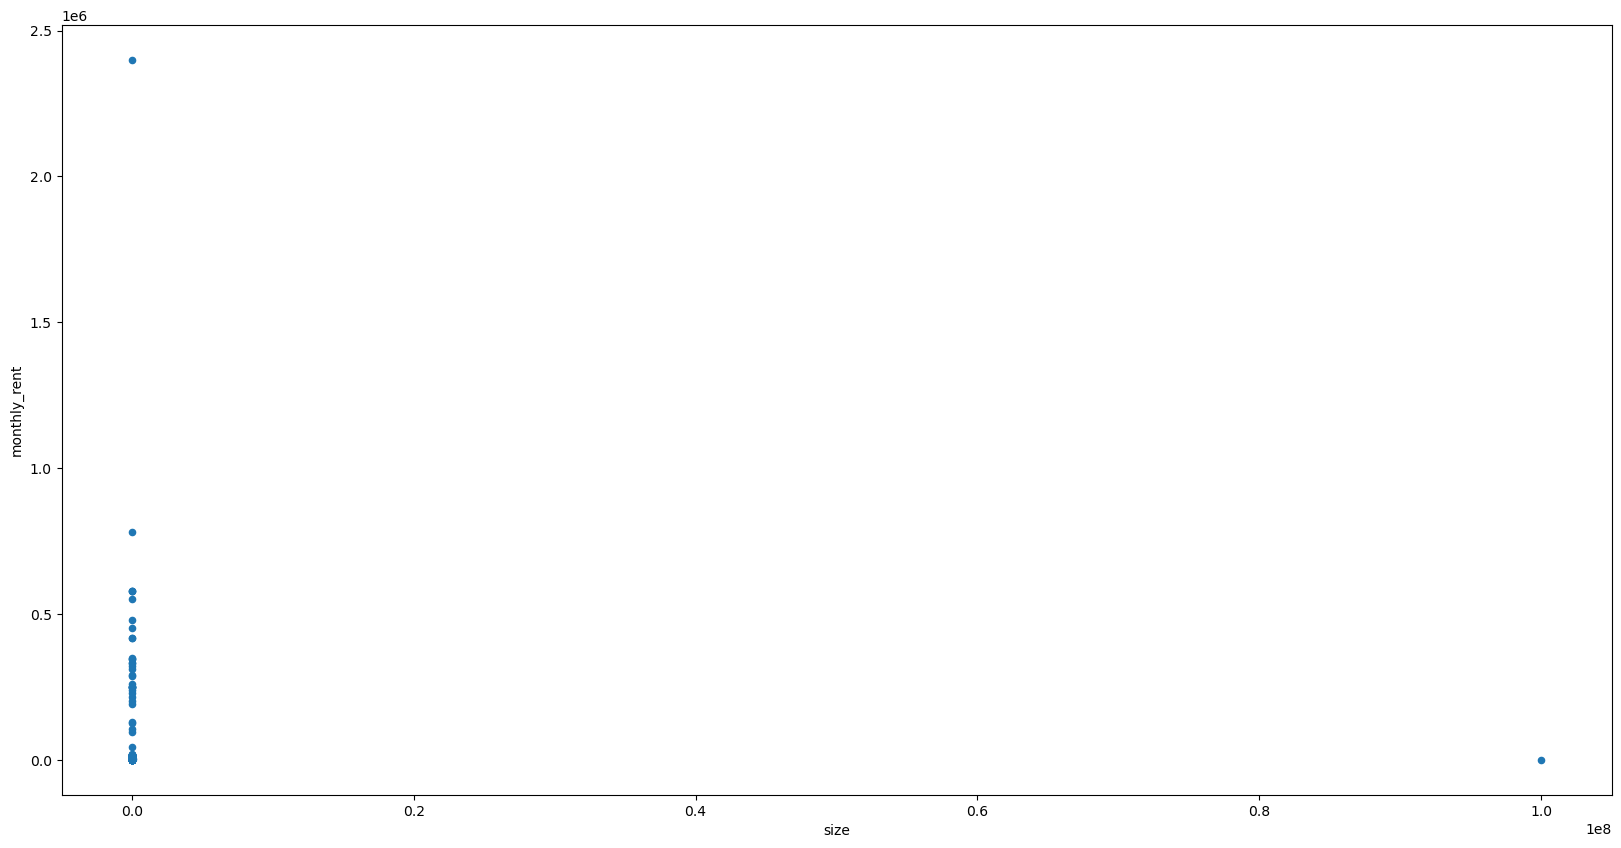

In [68]:
df3[['size', 'monthly_rent']].plot(kind='scatter', x='size', y='monthly_rent');
plt.show()

In [69]:
max(df3['size'])

99999999

In [70]:
max(df3['monthly_rent'])

2400000.0

In [71]:
min(df3['size'])

1

In [72]:
min(df3['monthly_rent'])

70.0

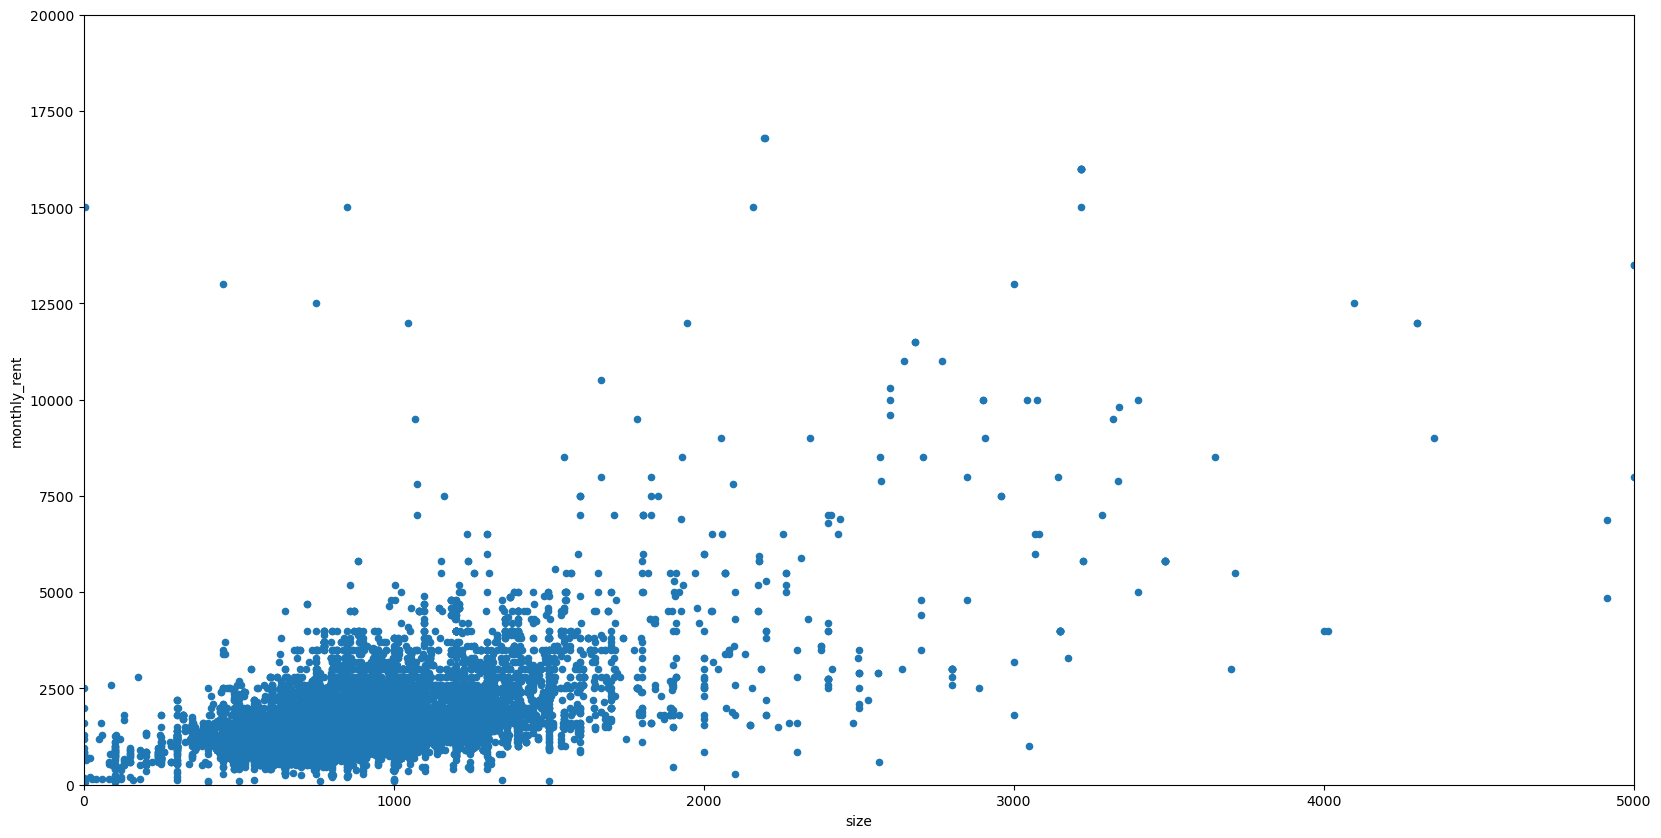

In [73]:
df3[['size', 'monthly_rent']].plot(kind='scatter', x='size', y='monthly_rent');
plt.xlim(0,5000) 
plt.ylim(0,20000) 
plt.show() 

In [74]:
df3.shape

(19983, 9)

In [75]:
df4 = df3.dropna(subset=['monthly_rent'])

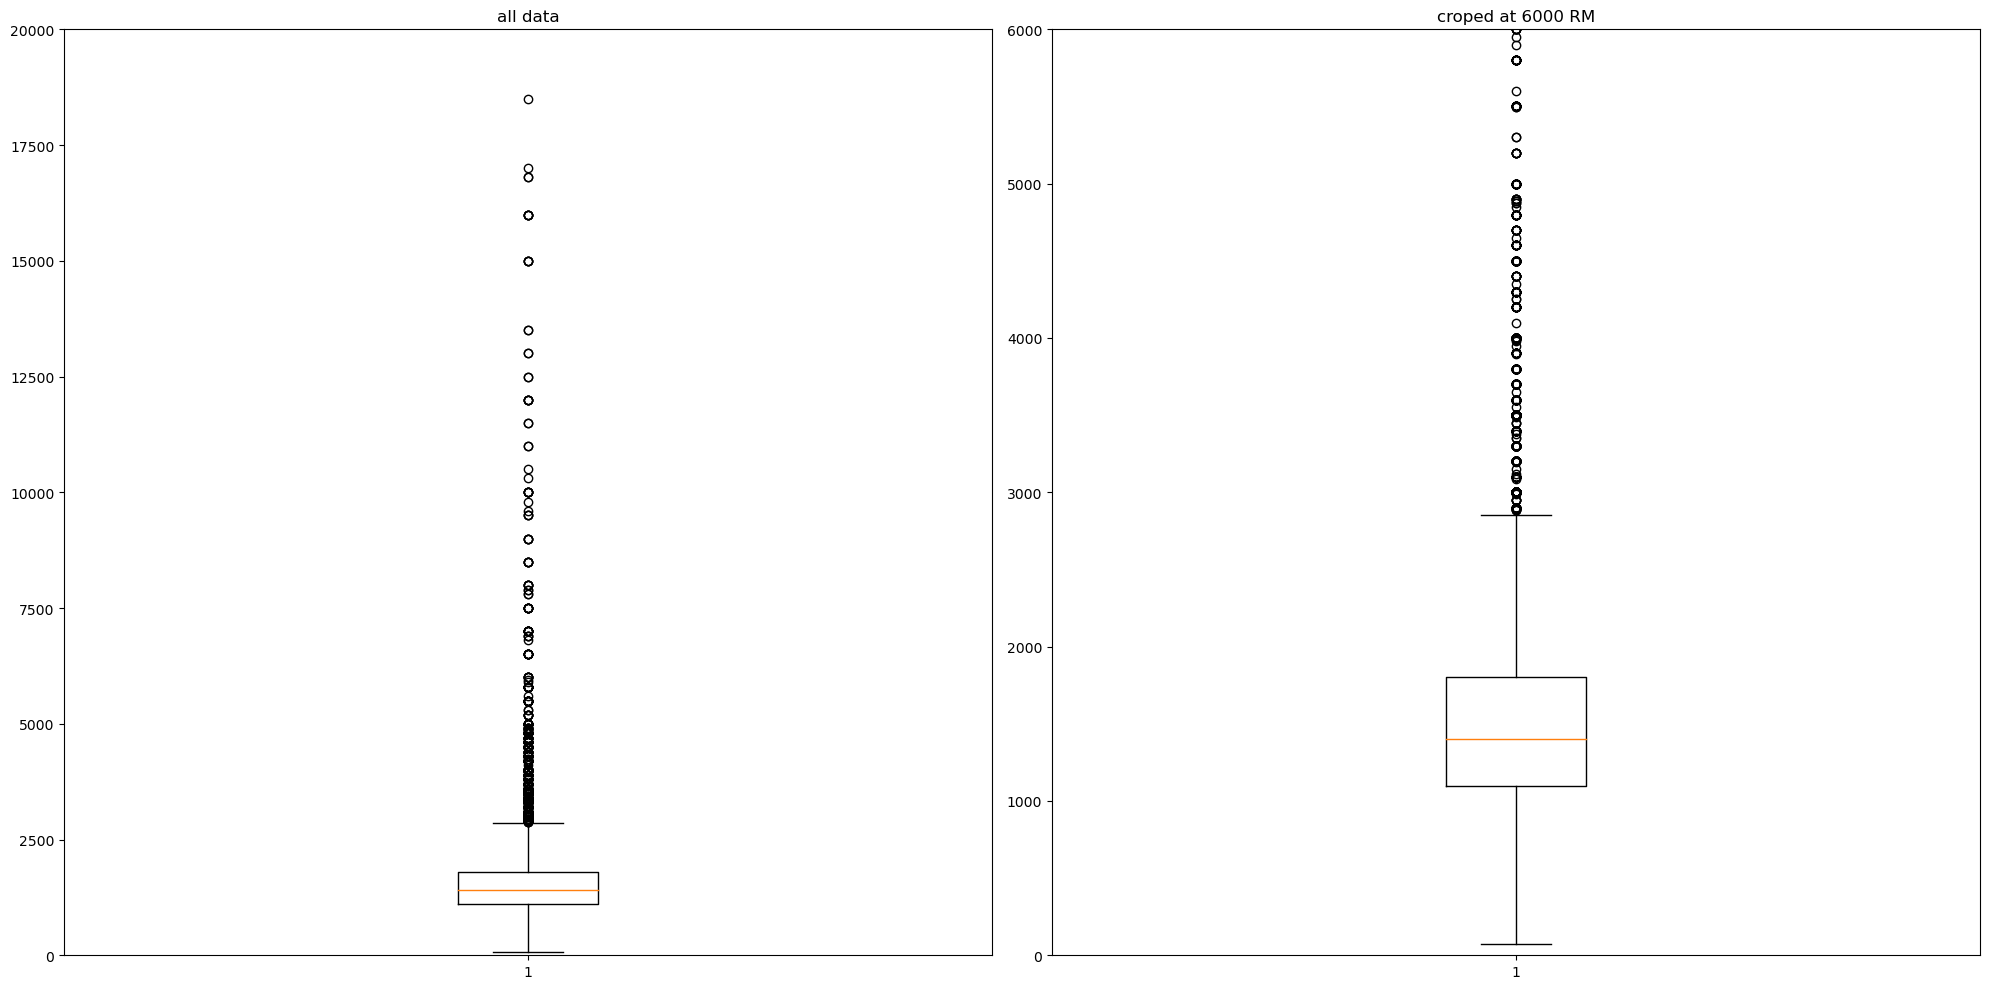

In [76]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df4, x='monthly_rent')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=df4, x='monthly_rent')
axs[1].set_ylim(0,6000)
axs[1].set_title('croped at 6000 RM')

plt.tight_layout()
plt.show()

In [77]:
df4.describe()

,monthly_rent,parking,bathroom,size
count,1.998100e+04,14283.000000,19975.000000,1.998100e+04
mean,2.269295e+03,1.416859,1.891765,5.924667e+03
std,2.241733e+04,0.567402,0.556239,7.074365e+05
min,7.000000e+01,1.000000,1.000000,1.000000e+00
25%,1.100000e+03,1.000000,2.000000,7.500000e+02
50%,1.400000e+03,1.000000,2.000000,8.860000e+02
75%,1.800000e+03,2.000000,2.000000,1.044000e+03
max,2.400000e+06,10.000000,8.000000,1.000000e+08


In [78]:
df5 = df4.query(" monthly_rent > 100 & monthly_rent < 6000 ")
df5.describe()

,monthly_rent,parking,bathroom,size
count,19837.000000,14173.000000,19833.000000,1.983700e+04
mean,1572.374452,1.412545,1.882015,5.953354e+03
std,731.908362,0.562295,0.530338,7.099996e+05
min,110.000000,1.000000,1.000000,1.000000e+00
25%,1100.000000,1.000000,2.000000,7.500000e+02
50%,1400.000000,1.000000,2.000000,8.840000e+02
75%,1800.000000,2.000000,2.000000,1.037000e+03
max,5950.000000,10.000000,8.000000,1.000000e+08


<Axes: >

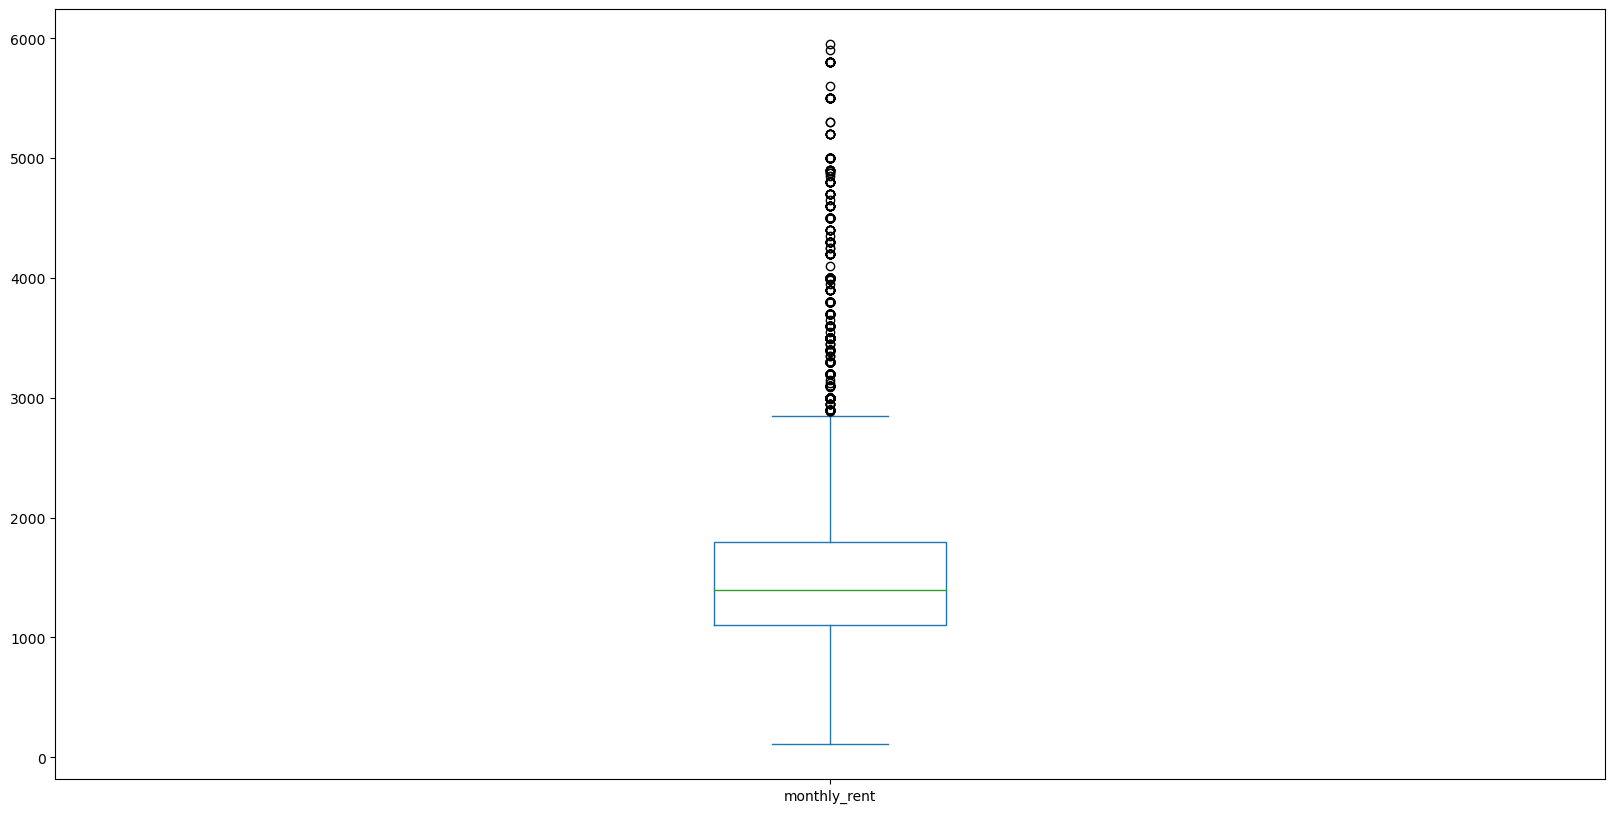

In [79]:
df5.monthly_rent.plot(kind='box', x='monthly_rent')

In [80]:
df5.shape

(19837, 9)

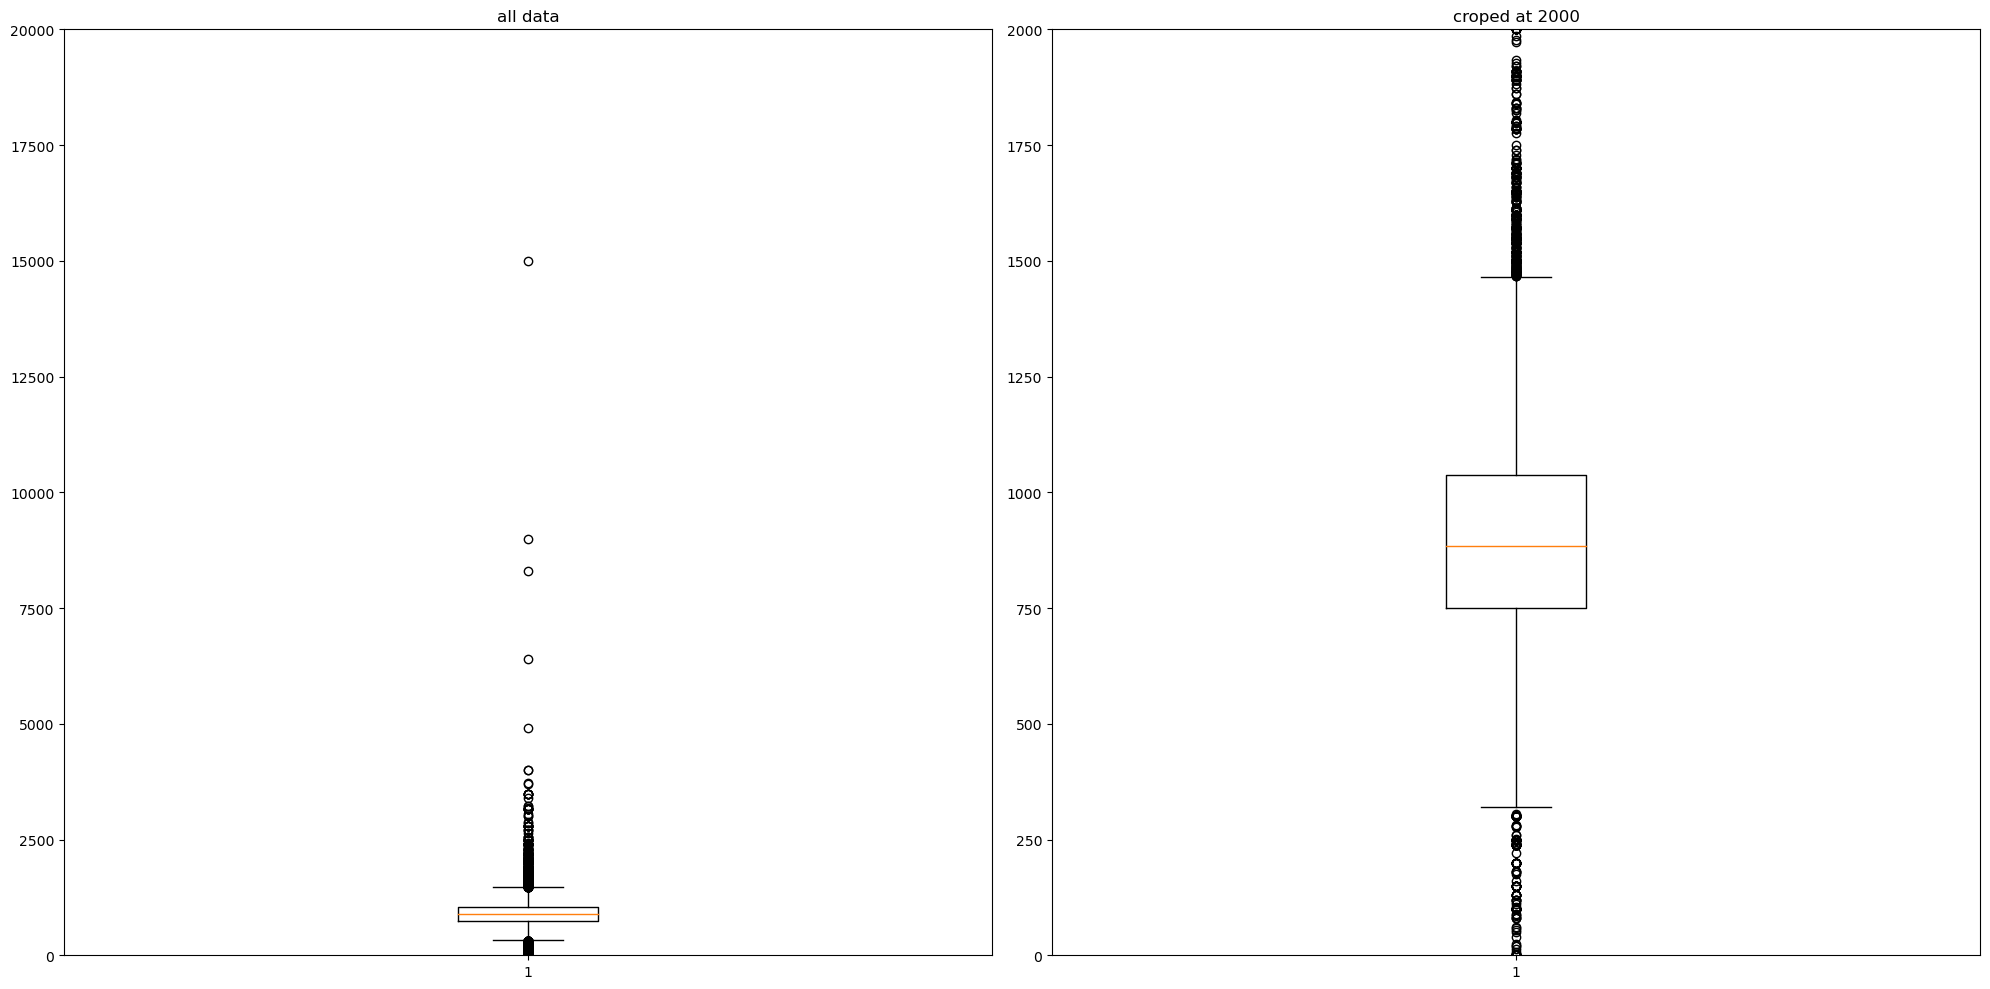

In [81]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data=df5, x='size')
axs[0].set_ylim(0,20000)
axs[0].set_title('all data')

axs[1].boxplot(data=df5, x='size')
axs[1].set_ylim(0,2000)
axs[1].set_title('croped at 2000')

plt.tight_layout()
plt.show()

In [82]:
df6 = df5.query(" size > 50 & size < 2000 ")
df6.describe()

,monthly_rent,parking,bathroom,size
count,19681.000000,14053.000000,19678.00000,19681.000000
mean,1560.262029,1.405394,1.86955,898.166861
std,709.056495,0.548234,0.49862,258.033166
min,120.000000,1.000000,1.00000,54.000000
25%,1100.000000,1.000000,2.00000,750.000000
50%,1400.000000,1.000000,2.00000,883.000000
75%,1800.000000,2.000000,2.00000,1027.000000
max,5800.000000,10.000000,8.00000,1986.000000


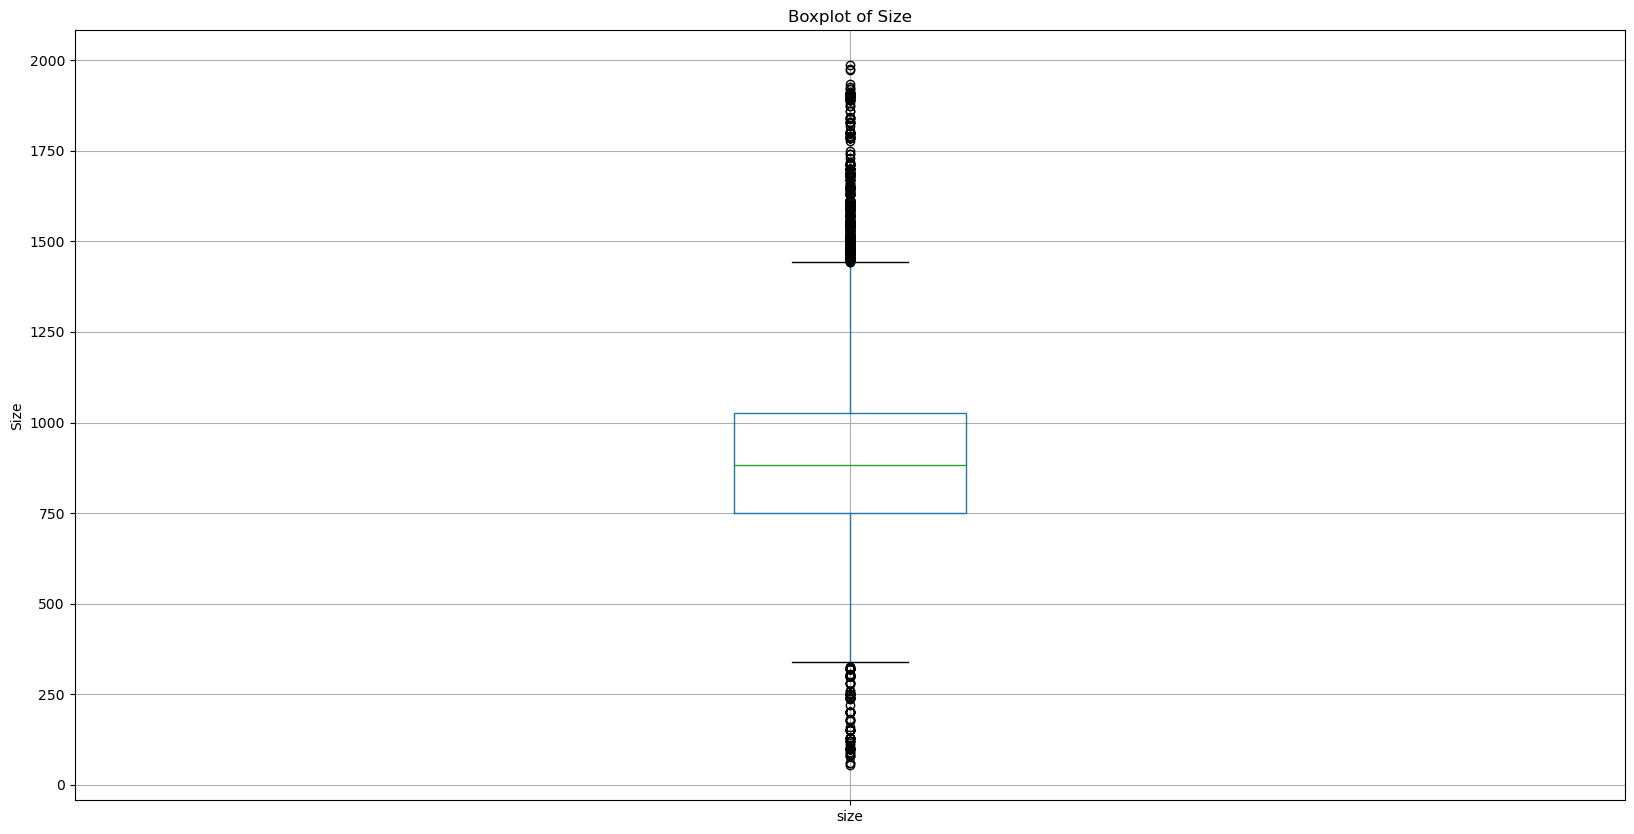

In [83]:
df6.boxplot(column='size')
plt.title('Boxplot of Size')
plt.ylabel('Size')
plt.show()

In [84]:
df6.shape

(19681, 9)

In [85]:
df6['bathroom'] = pd.to_numeric(df6['bathroom'], errors='coerce')
df6['rooms'] = pd.to_numeric(df6['rooms'], errors='coerce')

# Filter rows where 'bathroom' is greater than 'rooms' plus 2
remove = df6[df6['bathroom'] > df6['rooms'] + 2]

# Now remove contains the rows that satisfy the condition

# Create a boolean mask where each row is True if it's in 'remove', False otherwise
mask = df6.index.isin(remove.index)

C:\Users\spide\AppData\Local\Temp\ipykernel_12940\478404735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['bathroom'] = pd.to_numeric(df6['bathroom'], errors='coerce')
C:\Users\spide\AppData\Local\Temp\ipykernel_12940\478404735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['rooms'] = pd.to_numeric(df6['rooms'], errors='coerce')


In [86]:
# Filter rows where the mask is False, effectively removing the rows in 'remove'
df7 = df6[~mask]
df7.shape

(19680, 9)

In [87]:
df8 = df7.copy()
df8['rent_per_sqft'] = df8['monthly_rent']/df8['size']
df8.head()

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,nearby_trains,rent_per_sqft
0,4200.0,Taman Desa,Condominium,5.0,2.0,6.0,1842,Fully Furnished,no,2.280130
1,2300.0,Cheras,Condominium,3.0,1.0,2.0,1170,Partially Furnished,yes,1.965812
2,1000.0,Taman Desa,Apartment,3.0,NaN,2.0,650,Fully Furnished,NaN,1.538462
3,1700.0,Sentul,Apartment,2.0,1.0,2.0,743,Partially Furnished,yes,2.288022
4,1299.0,Mont Kiara,Service Residence,1.0,1.0,1.0,494,Not Furnished,no,2.629555


In [88]:
df8.rent_per_sqft.describe()

count    19680.000000
mean         1.814440
std          0.900208
min          0.088889
25%          1.250000
50%          1.614907
75%          2.153846
max         29.629630
Name: rent_per_sqft, dtype: float64

In [89]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.rent_per_sqft)
        st = np.std(subdf.rent_per_sqft)
        reduced_df = subdf[(subdf.rent_per_sqft>(m-st)) & (subdf.rent_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9 = remove_pps_outliers(df8)
df9.shape

(15332, 10)

In [90]:
df9.isnull().sum()

monthly_rent        0
location            0
property_type       0
rooms               4
parking          4181
bathroom            2
size                0
furnished           1
nearby_trains    4581
rent_per_sqft       0
dtype: int64

In [91]:
df10 = df9.drop(['rent_per_sqft'],axis='columns')
df10.shape

(15332, 9)

In [92]:
dfA = df10.dropna()
dfA.shape

(8274, 9)

In [93]:
#df11 = df10.drop(['parking','nearby_trains'],axis='columns')
#df11.shape

In [94]:
#dfB = df11.dropna()
#dfB.shape

In [95]:
#dfC = dfB.drop(['furnished'],axis='columns')
#dfC.shape

In [96]:
dfA.head()

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,nearby_trains
0,3000.0,360,Condominium,3.0,2.0,3.0,957,Fully Furnished,yes
1,2800.0,360,Condominium,3.0,2.0,2.0,850,Fully Furnished,yes
2,2200.0,360,Condominium,2.0,1.0,2.0,650,Fully Furnished,yes
3,2700.0,360,Condominium,3.0,2.0,2.0,810,Fully Furnished,yes
5,2200.0,360,Condominium,2.0,1.0,2.0,650,Fully Furnished,yes


In [97]:
pd.set_option("display.max_rows", None)
dfA.location.value_counts()

location
Cheras                   889
Kajang                   521
Setapak                  469
Cyberjaya                388
Sentul                   388
Shah Alam                384
Puchong                  356
Seri Kembangan           342
Kepong                   326
Bukit Jalil              269
Ampang                   246
Petaling Jaya            239
Keramat                  141
Sepang                   139
Taman Desa               134
Wangsa Maju              130
Old Klang Road           124
Jalan Ipoh               118
Setia Alam               111
Kuchai Lama              109
Mont Kiara               107
Semenyih                  97
Bangi                     94
Subang Jaya               94
KL City                   92
Jalan Kuching             90
Batu Caves                88
Kota Damansara            86
Damansara Perdana         81
KLCC                      79
Segambut                  77
Sungai Besi               75
Damansara Damai           70
Desa Pandan               64
Banda

In [98]:
dfA.property_type.value_counts()

property_type
Condominium          3913
Service Residence    2271
Apartment            1933
Studio                 55
Flat                   52
Duplex                 26
Others                 15
Townhouse Condo         9
Name: count, dtype: int64

In [99]:
# Compute the value counts for the 'location' column
location_counts = dfA['location'].value_counts()

# Identify locations with counts less than to 10
locations_to_remove = location_counts[location_counts < 10].index

# Filter out the rows corresponding to these locations
df11 = dfA[~dfA['location'].isin(locations_to_remove)]
df11.location.value_counts()

location
Cheras                   889
Kajang                   521
Setapak                  469
Sentul                   388
Cyberjaya                388
Shah Alam                384
Puchong                  356
Seri Kembangan           342
Kepong                   326
Bukit Jalil              269
Ampang                   246
Petaling Jaya            239
Keramat                  141
Sepang                   139
Taman Desa               134
Wangsa Maju              130
Old Klang Road           124
Jalan Ipoh               118
Setia Alam               111
Kuchai Lama              109
Mont Kiara               107
Semenyih                  97
Subang Jaya               94
Bangi                     94
KL City                   92
Jalan Kuching             90
Batu Caves                88
Kota Damansara            86
Damansara Perdana         81
KLCC                      79
Segambut                  77
Sungai Besi               75
Damansara Damai           70
Desa Pandan               64
Banda

In [100]:
# Compute the value counts for the 'location' column
property_type_counts = df11['property_type'].value_counts()

# Identify locations with counts less than 10
property_type_to_remove = property_type_counts[property_type_counts < 10].index

# Filter out the rows corresponding to these locations
df12 = df11[~df11['property_type'].isin(property_type_to_remove)]
df12.property_type.value_counts()

property_type
Condominium          3855
Service Residence    2218
Apartment            1910
Studio                 55
Flat                   50
Duplex                 26
Others                 15
Name: count, dtype: int64

In [101]:
dummies = pd.get_dummies(df12.select_dtypes(include='object'),dtype='int')
dummies.head()

,location_360,location_389,location_Ampang,location_Ampang Hilir,location_Ara Damansara,location_Balakong,location_Bandar Kinrara,location_Bandar Mahkota Cheras,location_Bandar Menjalara,location_Bandar Saujana Putra,...,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished,nearby_trains_no,nearby_trains_yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [102]:
df13 = pd.concat([df12,dummies.drop(['location_City','property_type_Others','furnished_Not Furnished','nearby_trains_no'],axis='columns')],axis='columns')
df13.head()

,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,nearby_trains,location_360,...,location_Wangsa Maju,property_type_Apartment,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Partially Furnished,nearby_trains_yes
0,3000.0,360,Condominium,3.0,2.0,3.0,957,Fully Furnished,yes,1,...,0,0,1,0,0,0,0,1,0,1
1,2800.0,360,Condominium,3.0,2.0,2.0,850,Fully Furnished,yes,1,...,0,0,1,0,0,0,0,1,0,1
2,2200.0,360,Condominium,2.0,1.0,2.0,650,Fully Furnished,yes,1,...,0,0,1,0,0,0,0,1,0,1
3,2700.0,360,Condominium,3.0,2.0,2.0,810,Fully Furnished,yes,1,...,0,0,1,0,0,0,0,1,0,1
5,2200.0,360,Condominium,2.0,1.0,2.0,650,Fully Furnished,yes,1,...,0,0,1,0,0,0,0,1,0,1


In [103]:
df14 = df13.drop([df12.columns[1],df12.columns[2],df12.columns[7],df12.columns[8]],axis='columns')
df14.head()

,monthly_rent,rooms,parking,bathroom,size,location_360,location_389,location_Ampang,location_Ampang Hilir,location_Ara Damansara,...,location_Wangsa Maju,property_type_Apartment,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Partially Furnished,nearby_trains_yes
0,3000.0,3.0,2.0,3.0,957,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,2800.0,3.0,2.0,2.0,850,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2200.0,2.0,1.0,2.0,650,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,2700.0,3.0,2.0,2.0,810,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,2200.0,2.0,1.0,2.0,650,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [104]:
df14.shape

(8129, 91)

In [105]:
X = df14.drop(['monthly_rent'],axis='columns')
X.head()

,rooms,parking,bathroom,size,location_360,location_389,location_Ampang,location_Ampang Hilir,location_Ara Damansara,location_Balakong,...,location_Wangsa Maju,property_type_Apartment,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Service Residence,property_type_Studio,furnished_Fully Furnished,furnished_Partially Furnished,nearby_trains_yes
0,3.0,2.0,3.0,957,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,3.0,2.0,2.0,850,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,2.0,1.0,2.0,650,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,3.0,2.0,2.0,810,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,2.0,1.0,2.0,650,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [106]:
y = df14.monthly_rent
y.head()

0    3000.0
1    2800.0
2    2200.0
3    2700.0
5    2200.0
Name: monthly_rent, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [110]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7849842798265815

In [111]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv) 

array([0.77052129, 0.74893554, 0.75422409, 0.7669479 , 0.7759776 ])

In [112]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\spide\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.763391,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.735564,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.713677,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [113]:
def predict_price(location,property,furnished,trains,rooms,parking,bathroom,size):    
    loc_index = np.where(X.columns==location)[0][0]
    pro_index = np.where(X.columns==property)[0][0]
    fur_index = np.where(X.columns==furnished)[0][0]
    tra_index = np.where(X.columns==trains)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = rooms
    x[1] = parking
    x[2] = bathroom
    x[3] = size
    if loc_index >= 0:
        x[loc_index] = 1
    if pro_index >= 0:
        x[pro_index] = 1 
    if fur_index >= 0:
        x[fur_index] = 1
    if tra_index >= 0:
        x[tra_index] = 1     

    return lr_clf.predict([x])[0]

In [114]:
def predict_rent(location, property_type, furnished, trains, rooms, parking, bathroom, size):    
    
    # Create the feature vector
    feature_vector = np.zeros(len(X.columns))
    feature_vector[0] = rooms
    feature_vector[1] = parking
    feature_vector[2] = bathroom
    feature_vector[3] = size
    
    # Find the indices of the categorical variables in the DataFrame
    location_index = X.columns.get_loc(f'location_{location}')
    property_type_index = X.columns.get_loc(f'property_type_{property_type}')
    furnished_index = X.columns.get_loc(f'furnished_{furnished}')
    trains_index = X.columns.get_loc(f'nearby_trains_{trains}')
    
    # Set the corresponding indices to 1
    feature_vector[location_index] = 1
    feature_vector[property_type_index] = 1 
    feature_vector[furnished_index] = 1
    feature_vector[trains_index] = 1
    
    # Make the prediction using the trained model
    predicted_rent = lr_clf.predict([feature_vector])[0]
    
    return predicted_rent

In [115]:
predict_rent('Cheras','Apartment','Partially Furnished','yes',3, 1, 2, 1000)

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1375.8463682965044

In [116]:
predict_rent('Cheras','Apartment','Fully Furnished','yes',3, 1, 2, 1000)

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1592.8754626803864

In [117]:
predict_rent('Cheras','Duplex','Fully Furnished','yes',3, 1, 2, 1000)

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1661.2026050505838

In [118]:
predict_rent('Ampang','Duplex','Fully Furnished','yes',3, 1, 2, 1000)

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1712.849050141865

In [119]:
X.columns

Index(['rooms', 'parking', 'bathroom', 'size', 'location_360', 'location_389',
       'location_Ampang', 'location_Ampang Hilir', 'location_Ara Damansara',
       'location_Balakong', 'location_Bandar Kinrara',
       'location_Bandar Mahkota Cheras', 'location_Bandar Menjalara',
       'location_Bandar Saujana Putra', 'location_Bandar Sri Damansara',
       'location_Bandar Sungai Long', 'location_Bandar Sunway',
       'location_Bangi', 'location_Bangsar', 'location_Bangsar South',
       'location_Batu Caves', 'location_Brickfields', 'location_Bukit Bintang',
       'location_Bukit Jalil', 'location_Bukit Jelutong', 'location_Cheras',
       'location_City Centre', 'location_Cyberjaya',
       'location_Damansara Damai', 'location_Damansara Heights',
       'location_Damansara Perdana', 'location_Dengkil',
       'location_Desa Pandan', 'location_Desa ParkCity',
       'location_Desa Petaling', 'location_Gombak', 'location_Jalan Ipoh',
       'location_Jalan Kuching', 'location_KL C